In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.load('proyecto_training_data.npy')
train_data_length = (int)(data.shape[0] * 0.8)
train_data = data[0:train_data_length,:]
test_data = data[train_data_length:,:]

sale_price_train_d = (train_data[:,0]).astype(np.float32)
overall_quality_train_d = (train_data[:,1]).astype(np.float32)

sale_price_test_d = test_data[:,0]
overall_quality_test_d = test_data[:,1]

def run_tf(learning_rate):
    tf.reset_default_graph()

    # graph = tf.Graph()
    # with graph.as_default():
    X = tf.placeholder("float", name="Overall")
    Y = tf.placeholder("float", name="Sales")

    w = tf.Variable(np.random.randn(), dtype = tf.float32, name = 'W')
    b = tf.Variable(np.random.randn(), dtype = tf.float32, name = 'b')

    y_pred = (X* w) + b

    loss = tf.reduce_mean(tf.square(Y - y_pred, name='cost'))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        writer = tf.summary.FileWriter('./graphs', sess.graph)
        for epoch in range(2000):
            sess.run(optimizer, feed_dict={X: overall_quality_train_d, Y: sale_price_train_d})

            if (epoch+1) % 50 == 0:
                c = sess.run(loss, feed_dict={X: overall_quality_train_d, Y:sale_price_train_d})
                print(c)
                print("Epoch:", '%04d' % (epoch+1), "cost=", '%f' % c, \
                    "W=", sess.run(w), "b=", sess.run(b))

        print("Optimización finalizada!")
        training_cost = sess.run(loss, feed_dict={X: overall_quality_train_d, Y: sale_price_train_d})
        print("Training cost=", training_cost, "W=", sess.run(w), "b=", sess.run(b), '\n')

        # Mostramos resultados
        plt.plot(overall_quality_train_d, sale_price_train_d, 'ro', label='Datos Originales')

        #Para el ejemplo de ventas
        plt.xlabel("Overall Quality")
        plt.ylabel("Sales price")

        #Para el ejemplo de aleatorio
        #plt.xlabel("Valor fijo")
        #plt.ylabel("Valares tomados")

        plt.plot(overall_quality_train_d, sess.run(w) * overall_quality_train_d + sess.run(b), label='Recta de regresion')
        plt.legend()
        plt.show()
    writer.close()

![Grafo](img/graph.png)

nan
Epoch: 0050 cost= nan W= nan b= nan
nan
Epoch: 0100 cost= nan W= nan b= nan
nan
Epoch: 0150 cost= nan W= nan b= nan
nan
Epoch: 0200 cost= nan W= nan b= nan
nan
Epoch: 0250 cost= nan W= nan b= nan
nan
Epoch: 0300 cost= nan W= nan b= nan
nan
Epoch: 0350 cost= nan W= nan b= nan
nan
Epoch: 0400 cost= nan W= nan b= nan
nan
Epoch: 0450 cost= nan W= nan b= nan
nan
Epoch: 0500 cost= nan W= nan b= nan
nan
Epoch: 0550 cost= nan W= nan b= nan
nan
Epoch: 0600 cost= nan W= nan b= nan
nan
Epoch: 0650 cost= nan W= nan b= nan
nan
Epoch: 0700 cost= nan W= nan b= nan
nan
Epoch: 0750 cost= nan W= nan b= nan
nan
Epoch: 0800 cost= nan W= nan b= nan
nan
Epoch: 0850 cost= nan W= nan b= nan
nan
Epoch: 0900 cost= nan W= nan b= nan
nan
Epoch: 0950 cost= nan W= nan b= nan
nan
Epoch: 1000 cost= nan W= nan b= nan
nan
Epoch: 1050 cost= nan W= nan b= nan
nan
Epoch: 1100 cost= nan W= nan b= nan
nan
Epoch: 1150 cost= nan W= nan b= nan
nan
Epoch: 1200 cost= nan W= nan b= nan
nan
Epoch: 1250 cost= nan W= nan b= nan


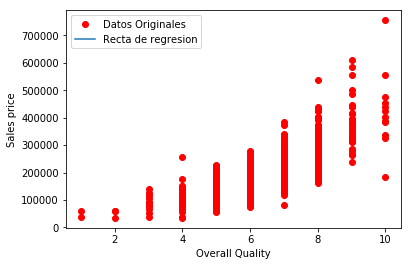

In [16]:
run_tf(10)
run_tf(1)
run_tf(0.1)
run_tf(0.01)
runt_tf(,0.001)